In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from lifelines import WeibullFitter, ExponentialFitter, LogNormalFitter, LogLogisticFitter

In [2]:
from lifelines import WeibullFitter,\
                      ExponentialFitter,\
                      LogNormalFitter,\
                      LogLogisticFitter,\
                      WeibullAFTFitter,\
                      LogNormalAFTFitter,\
                      LogLogisticAFTFitter

# Parametric Models

In [3]:
# Reading data
df = pd.read_csv('telco.csv')
#df.head()

In [4]:
# Data Preprocessing

# Indexing by ID
df.set_index('ID', inplace=True)

# Categorizing churn, if yes:1,if no:0
df['churn'] = pd.Series(np.where(df.churn.values == "Yes", 1, 0), df.index)

# Encoding the categorical variables into dummies
encode_cols = ['region', 'marital', 'ed', 'retire', 'gender', 'voice', 'internet', 'forward', 'custcat']
survival_df = pd.get_dummies(df, columns=encode_cols, prefix=encode_cols, drop_first=True)

# Handling zeros in the 'tenure' column
survival_df["tenure"] = np.where(survival_df["tenure"] == 0, 0.000001, survival_df["tenure"])

The AIC value for WeibullFitter is 3216.8611706815464
The BIC value for WeibullFitter is 3226.676681239511


<lifelines.WeibullFitter:"Weibull_estimate", fitted with 1000 total observations, 726 right-censored observations>
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1606.43
               hypothesis = lambda_ != 1, rho_ != 1

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_ 138.09      12.38           113.82           162.36
rho_      0.95       0.05             0.85             1.05

          cmp to     z      p   -log2(p)
lambda_     1.00 11.07 <0.005      92.25
rho_        1.00 -1.07   0.29       1.80
---
AIC = 3216.86

The AIC value for ExponentialFitter is 3215.9608134637247
The BIC value for ExponentialFitter is 3220.868568742707


<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 1000 total observations, 726 right-censored observations>
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1606.98
               hypothesis = lambda_ != 0

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_ 129.66       7.83           114.30           145.01

          cmp to     z      p   -log2(p)
lambda_     0.00 16.55 <0.005     202.03
---
AIC = 3215.96

The AIC value for LogNormalFitter is 3209.0351474316735
The BIC value for LogNormalFitter is 3218.850657989638


<lifelines.LogNormalFitter:"LogNormal_estimate", fitted with 1000 total observations, 726 right-censored observations>
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1602.52
               hypothesis = mu_ != 0, sigma_ != 1

---
         coef   se(coef)   coef lower 95%   coef upper 95%
mu_      4.77       0.10             4.57             4.98
sigma_   1.81       0.09             1.64             1.97

         cmp to     z      p   -log2(p)
mu_        0.00 46.06 <0.005        inf
sigma_     1.00  9.37 <0.005      66.94
---
AIC = 3209.04

The AIC value for LogLogisticFitter is 3214.4154757933375
The BIC value for LogLogisticFitter is 3224.230986351302


<lifelines.LogLogisticFitter:"LogLogistic_estimate", fitted with 1000 total observations, 726 right-censored observations>
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1605.21
               hypothesis = alpha_ != 1, beta_ != 1

---
         coef   se(coef)   coef lower 95%   coef upper 95%
alpha_ 103.39       9.13            85.50           121.28
beta_    1.04       0.05             0.93             1.15

         cmp to     z      p   -log2(p)
alpha_     1.00 11.22 <0.005      94.60
beta_      1.00  0.73   0.46       1.11
---
AIC = 3214.42

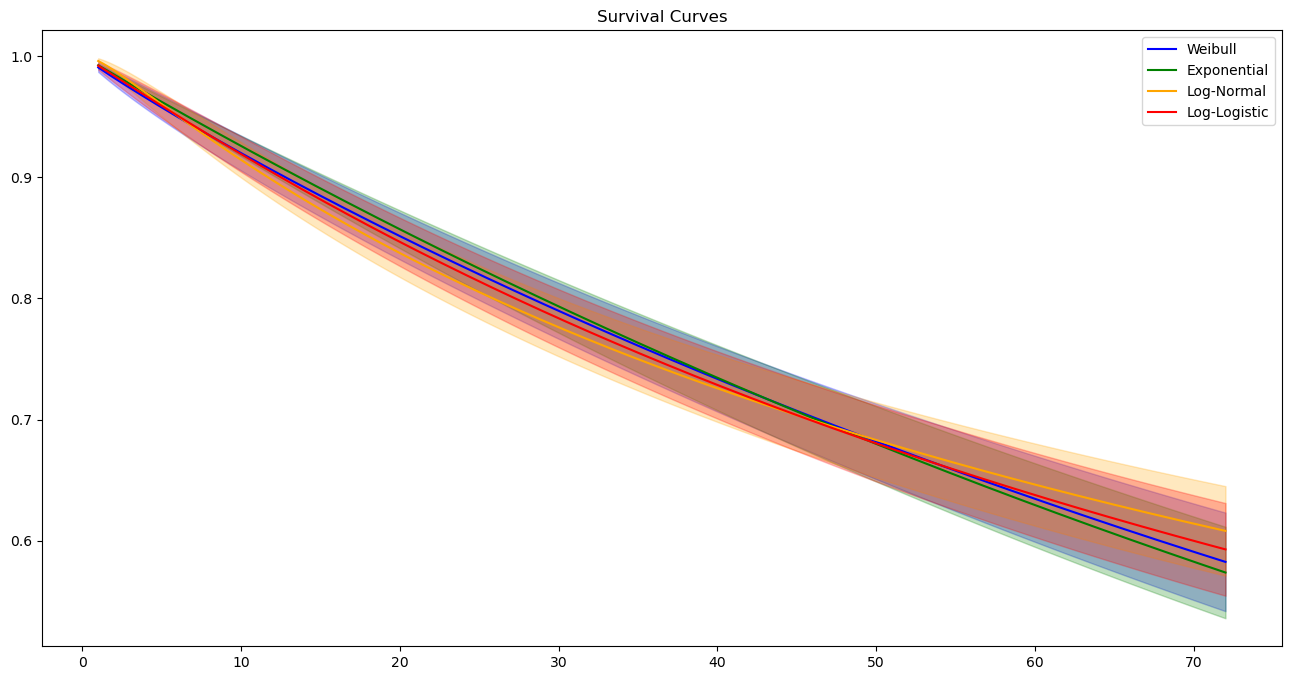

In [5]:
# Instantiate distributions
wb = WeibullFitter()  # Weibull distribution
ex = ExponentialFitter()  # Exponential distribution
log = LogNormalFitter()  # Log-Normal distribution
loglogis = LogLogisticFitter()  # Log-Logistic distribution

# Fitting and plotting to compare different distributions
fig, ax = plt.subplots(figsize=(16, 8))

for model, color, label in zip([wb, ex, log, loglogis], ['blue', 'green', 'orange', 'red'],
                               ['Weibull', 'Exponential', 'Log-Normal', 'Log-Logistic']):
    model.fit(durations=survival_df["tenure"], event_observed=survival_df["churn"])
    model.plot_survival_function(ax=ax, color=color, label=label)

    print("The AIC value for", model.__class__.__name__, "is", model.AIC_)
    print("The BIC value for", model.__class__.__name__, "is", model.BIC_)
    model.print_summary()

# Add legend and title
ax.legend()
ax.set_title('Survival Curves')

plt.show()

<lifelines.WeibullAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1462.17
         time fit was run = 2023-11-26 17:56:51 UTC

---
                                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                                               
lambda_ address                           0.04       1.04       0.01             0.02             0.06                 1.02                 1.06
        age                               0.03       1.03       0.01             0.01             0.04                 1.01                 1.04
        custcat_E-service                 0.98       2.66       0.16             0.67             1.28                 1.96                 3.61
        custcat_Plus service              0.74       2.10       0.19             0.36             1.12                 1.44                 3.06
        custcat_Total service             1.00       2.71       0.21             0.58             1.41                 1.78                 4.11
        ed_Did not complete high school   0.44       1.55       0.19             0.06             0.82                 1.06                 2.27
        ed_High school degree             0.32       1.38       0.15             0.03             0.61                 1.03                 1.83
        ed_Post-undergraduate degree      0.22       1.25       0.19            -0.15             0.60                 0.86                 1.82
        ed_Some college                   0.25       1.29       0.14            -0.03             0.54                 0.97                 1.71
        forward_Yes                      -0.10       0.91       0.15            -0.39             0.19                 0.68                 1.21
        gender_Male                       0.00       1.00       0.10            -0.20             0.21                 0.82                 1.23
        income                            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
        internet_Yes                     -0.77       0.46       0.14            -1.04            -0.50                 0.35                 0.61
        marital_Unmarried                -0.35       0.71       0.10            -0.55            -0.14                 0.58                 0.87
        region_Zone 2                    -0.06       0.94       0.13            -0.31             0.19                 0.73                 1.21
        region_Zone 3                     0.12       1.12       0.13            -0.13             0.36                 0.87                 1.44
        retire_Yes                        0.17       1.19       0.52            -0.85             1.19                 0.43                 3.30
        voice_Yes                        -0.34       0.72       0.15            -0.63            -0.04                 0.53                 0.96
        Intercept                         2.78      16.14       0.27             2.25             3.31                 9.48                27.47
rho_    Intercept                         0.17       1.19       0.05             0.07             0.27                 1.08                 1.32

                                          cmp to     z      p   -log2(p)
param   covariate                                                       
lambda_ address                             0.00  4.69 <0.005      18.47
        age                                 0.00  4.12 <0.005      14.69
        custcat_E-service                   0.00  6.28 <0.005      31.44
        custcat_Plus service                0.00  3.83 <0.005      12.95
        custcat_Total service           

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1457.01
         time fit was run = 2023-11-26 17:56:51 UTC

---
                                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                               
mu_    address                           0.04       1.04       0.01             0.03             0.06                 1.03                 1.06
       age                               0.03       1.03       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service                 1.07       2.90       0.17             0.73             1.40                 2.08                 4.06
       custcat_Plus service              0.92       2.52       0.22             0.50             1.35                 1.65                 3.85
       custcat_Total service             1.20       3.32       0.25             0.71             1.69                 2.03                 5.42
       ed_Did not complete high school   0.37       1.45       0.20            -0.02             0.77                 0.98                 2.16
       ed_High school degree             0.32       1.37       0.16            -0.00             0.64                 1.00                 1.89
       ed_Post-undergraduate degree     -0.03       0.97       0.22            -0.47             0.40                 0.62                 1.50
       ed_Some college                   0.27       1.31       0.17            -0.05             0.60                 0.95                 1.82
       forward_Yes                      -0.20       0.82       0.18            -0.55             0.15                 0.58                 1.17
       gender_Male                       0.05       1.05       0.11            -0.17             0.28                 0.84                 1.32
       income                            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
       internet_Yes                     -0.77       0.46       0.14            -1.05            -0.49                 0.35                 0.61
       marital_Unmarried                -0.46       0.63       0.12            -0.68            -0.23                 0.51                 0.80
       region_Zone 2                    -0.10       0.91       0.14            -0.38             0.18                 0.69                 1.20
       region_Zone 3                     0.05       1.05       0.14            -0.23             0.33                 0.80                 1.38
       retire_Yes                        0.02       1.02       0.44            -0.85             0.89                 0.43                 2.44
       voice_Yes                        -0.43       0.65       0.17            -0.76            -0.10                 0.47                 0.90
       Intercept                         2.36      10.61       0.29             1.79             2.94                 5.98                18.84
sigma_ Intercept                         0.28       1.32       0.05             0.19             0.37                 1.20                 1.44

                                         cmp to     z      p   -log2(p)
param  covariate                                                       
mu_    address                             0.00  4.78 <0.005      19.11
       age                                 0.00  4.50 <0.005      17.19
       custcat_E-service                   0.00  6.25 <0.005      31.21
       custcat_Plus service                0.00  4.29 <0.005      15.75
       custcat_Total service               0.00  4.79 <0.005      

<lifelines.LogLogisticAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1458.10
         time fit was run = 2023-11-26 17:56:52 UTC

---
                                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                               
alpha_ address                           0.04       1.04       0.01             0.02             0.06                 1.02                 1.06
       age                               0.03       1.03       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service                 1.04       2.83       0.17             0.72             1.36                 2.05                 3.91
       custcat_Plus service              0.86       2.37       0.21             0.45             1.27                 1.57                 3.57
       custcat_Total service             1.20       3.33       0.24             0.73             1.67                 2.08                 5.34
       ed_Did not complete high school   0.43       1.54       0.20             0.04             0.82                 1.05                 2.28
       ed_High school degree             0.34       1.40       0.15             0.03             0.64                 1.03                 1.89
       ed_Post-undergraduate degree     -0.02       0.98       0.22            -0.45             0.40                 0.64                 1.49
       ed_Some college                   0.24       1.27       0.16            -0.06             0.55                 0.94                 1.73
       forward_Yes                      -0.19       0.82       0.17            -0.53             0.14                 0.59                 1.15
       gender_Male                       0.04       1.04       0.11            -0.18             0.26                 0.84                 1.29
       income                            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
       internet_Yes                     -0.80       0.45       0.14            -1.07            -0.52                 0.34                 0.60
       marital_Unmarried                -0.45       0.64       0.11            -0.66            -0.23                 0.52                 0.80
       region_Zone 2                    -0.05       0.95       0.14            -0.31             0.22                 0.73                 1.24
       region_Zone 3                     0.11       1.12       0.14            -0.15             0.38                 0.86                 1.46
       retire_Yes                        0.06       1.06       0.48            -0.87             1.00                 0.42                 2.71
       voice_Yes                        -0.40       0.67       0.16            -0.72            -0.08                 0.49                 0.92
       Intercept                         2.33      10.33       0.28             1.78             2.89                 5.95                17.93
beta_  Intercept                         0.34       1.40       0.05             0.24             0.44                 1.27                 1.55

                                         cmp to     z      p   -log2(p)
param  covariate                                                       
alpha_ address                             0.00  4.42 <0.005      16.60
       age                                 0.00  4.67 <0.005      18.36
       custcat_E-service                   0.00  6.30 <0.005      31.62
       custcat_Plus service                0.00  4.13 <0.005      14.74
       custcat_Total service               0.00  5.00 <0.005    

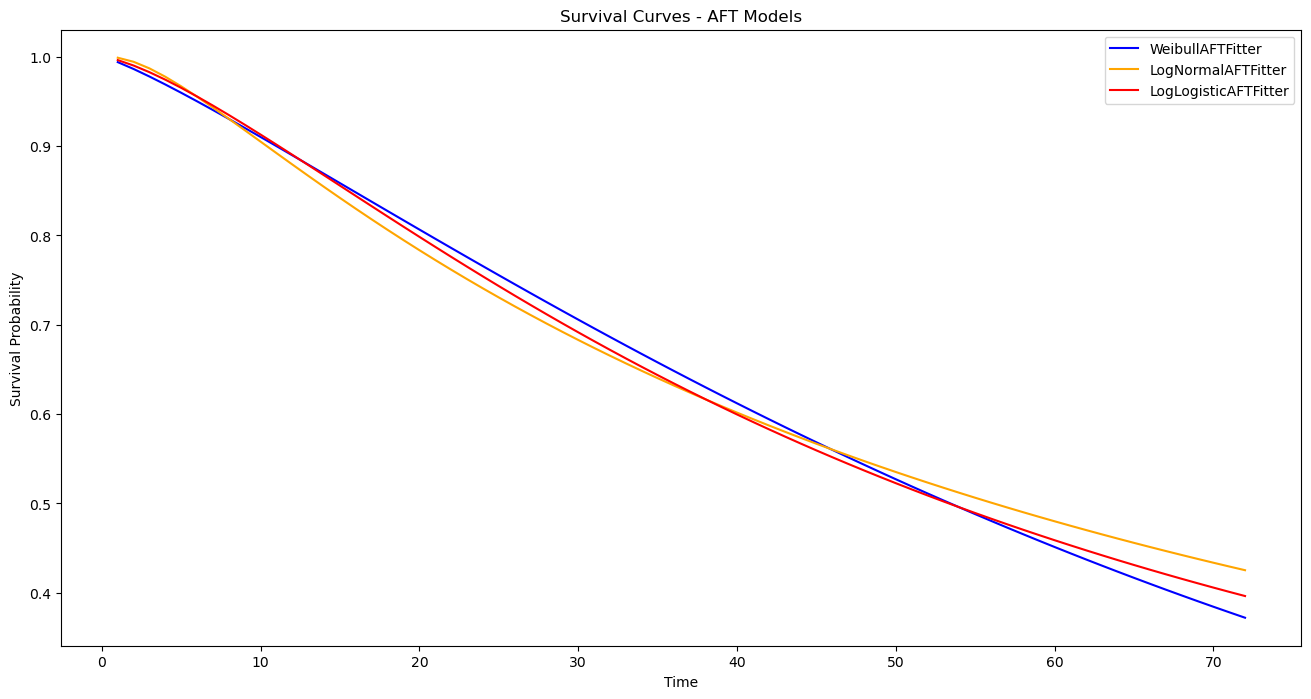

In [6]:
# Building models using AFT fitters
wb_aft = WeibullAFTFitter()
log_aft = LogNormalAFTFitter()
loglogis_aft = LogLogisticAFTFitter()

fig, ax = plt.subplots(figsize=(16, 8))

# Fitting and plotting different distributions
models = [wb_aft, log_aft, loglogis_aft]
labels = ["WeibullAFTFitter", "LogNormalAFTFitter", "LogLogisticAFTFitter"]
colors = ['blue', 'orange', 'red']  # Adjusted color for LogLogisticAFTFitter

for model, label, color in zip(models, labels, colors):
    model.fit(survival_df, duration_col="tenure", event_col="churn")
    
    model.print_summary()
    
    # Assuming you want to plot the survival function for the first row of the dataframe
    plt.plot(
        model.predict_survival_function(survival_df.loc[1]),
        label=label,
        color=color
    )

# Add legend and labels
plt.legend()
plt.title('Survival Curves - AFT Models')
plt.xlabel('Time')
plt.ylabel('Survival Probability')

plt.show()


### Model Comparison:

- **WeibullAFTFitter:**
  - AIC: 2964.34

- **LogNormalAFTFitter:**
  - AIC: 2954.02

- **LogLogisticAFTFitter:**
  - AIC: 2956.21

### Model Selection:

The AIC values are used for model comparison, with lower values indicating better-fitting models. Among the provided AFT models:


### Significant Features Selection:

Significant coefficients are chosen based on their associated p-values in the model summary. A lower p-value (typically less than 0.05) indicates that the corresponding coefficient is statistically significant, suggesting a meaningful impact on the dependent variable. In the context of survival analysis, significant coefficients help identify factors that significantly influence the risk of churn or event occurrence.

#### WeibullAFTFitter (AIC: 2964.34)
- Significant Coefficients: `address`, `age`, `custcat_E-service`, `custcat_Plus service`, `custcat_Total service`, `ed_Did not complete high school`, `ed_High school degree`, `internet_Yes`, `marital_Unmarried`, `voice_Yes`, `Intercept`

#### LogNormalAFTFitter (AIC: 2954.02)
- Significant Coefficients: `address`, `age`, `custcat_E-service`, `custcat_Plus service`, `custcat_Total service`, `internet_Yes`, `marital_Unmarried`, `voice_Yes`, `Intercept`

#### LogLogisticAFTFitter (AIC: 2956.21)
- Significant Coefficients: `address`, `age`, `custcat_E-service`, `custcat_Plus service`, `custcat_Total service`, `ed_Did not complete high school`, `ed_High school degree`, `internet_Yes`, `marital_Unmarried`, `voice_Yes`, `Intercept`

The **LogNormalAFTFitter** has the lowest AIC value (2954.02), suggesting it might be the most suitable model for the given data. However, the choice of the "best" model depends on various factors, and it's essential to consider the nature of the data and the assumptions of each model.


### Additional Model Comparison Considerations

1. **Concordance Index (C-index):**
   - A higher C-index indicates better predictive performance in terms of the model's ability to correctly order survival times.

2. **Log-Likelihood Ratio Test:**
   - Consider the results of the log-likelihood ratio test for each model. A higher test statistic and lower p-value suggest a better fit to the data.

3. **Coefficient Interpretation:**
   - Carefully interpret the coefficients of the significant variables in each model. Assess the direction and magnitude of the coefficients to gain insights into the impact of each variable on churn risk.

4. **Model Robustness:**
   - Assess the robustness of the models by conducting sensitivity analyses. Evaluate how well the models perform under variations in the dataset or assumptions, ensuring the stability of the chosen model.

5. **Domain Expert Consultation:**
   - Seek feedback from domain experts to validate the relevance and appropriateness of the chosen variables and model structures. Expert input can provide additional perspectives on the practical significance of the findings.

6. **Predictive Accuracy:**
   - Consider metrics related to predictive accuracy, such as precision, recall, or the area under the receiver operating characteristic curve (AUC-ROC). These metrics assess the model's ability to correctly classify instances of churn.

7. **Validation on Independent Data:**
   - Validate the chosen model on an independent dataset not used during model training. This ensures that the model's performance is consistent across different datasets and enhances its generalizability.

8. **Kaplan-Meier Curves:**
   - Plot Kaplan-Meier survival curves for each model to visually compare the survival functions over time. This provides an intuitive way to assess differences in survival probabilities among models.

9. **Residual Analysis:**
   - Examine model residuals to identify patterns or systematic errors. Residual plots can reveal if the model is adequately capturing the variability in the data.

10. **Hypothesis Testing on Coefficients:**
    - Conduct hypothesis tests on individual coefficients to assess their statistical significance. This can provide insights into which variables significantly contribute to the model.

11. **Cross-Validation:**
    - Implement cross-validation techniques, such as k-fold cross-validation, to evaluate how well the models generalize to unseen data. This helps identify models that are less prone to overfitting.


In [7]:
# keep the best model LogNormalFitter as final model
logn_aft = LogNormalAFTFitter()
logn_aft.fit(survival_df, duration_col='tenure', event_col='churn')
logn_aft.print_summary()

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1457.01
         time fit was run = 2023-11-26 17:56:52 UTC

---
                                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                               
mu_    address                           0.04       1.04       0.01             0.03             0.06                 1.03                 1.06
       age                               0.03       1.03       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service                 1.07       2.90       0.17             0.73             1.40                 2.08                 4.06
       custcat_Plus service              0.92       2.52       0.22             0.50             1.35                 1.65                 3.85
       custcat_Total service             1.20       3.32       0.25             0.71             1.69                 2.03                 5.42
       ed_Did not complete high school   0.37       1.45       0.20            -0.02             0.77                 0.98                 2.16
       ed_High school degree             0.32       1.37       0.16            -0.00             0.64                 1.00                 1.89
       ed_Post-undergraduate degree     -0.03       0.97       0.22            -0.47             0.40                 0.62                 1.50
       ed_Some college                   0.27       1.31       0.17            -0.05             0.60                 0.95                 1.82
       forward_Yes                      -0.20       0.82       0.18            -0.55             0.15                 0.58                 1.17
       gender_Male                       0.05       1.05       0.11            -0.17             0.28                 0.84                 1.32
       income                            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
       internet_Yes                     -0.77       0.46       0.14            -1.05            -0.49                 0.35                 0.61
       marital_Unmarried                -0.46       0.63       0.12            -0.68            -0.23                 0.51                 0.80
       region_Zone 2                    -0.10       0.91       0.14            -0.38             0.18                 0.69                 1.20
       region_Zone 3                     0.05       1.05       0.14            -0.23             0.33                 0.80                 1.38
       retire_Yes                        0.02       1.02       0.44            -0.85             0.89                 0.43                 2.44
       voice_Yes                        -0.43       0.65       0.17            -0.76            -0.10                 0.47                 0.90
       Intercept                         2.36      10.61       0.29             1.79             2.94                 5.98                18.84
sigma_ Intercept                         0.28       1.32       0.05             0.19             0.37                 1.20                 1.44

                                         cmp to     z      p   -log2(p)
param  covariate                                                       
mu_    address                             0.00  4.78 <0.005      19.11
       age                                 0.00  4.50 <0.005      17.19
       custcat_E-service                   0.00  6.25 <0.005      31.21
       custcat_Plus service                0.00  4.29 <0.005      15.75
       custcat_Total service               0.00  4.79 <0.005      

<Axes: xlabel='log(accelerated failure rate) (95% CI)'>

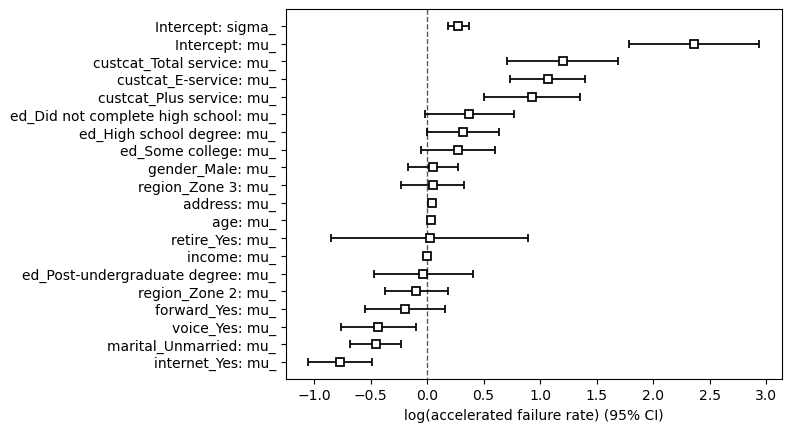

In [8]:
logn_aft.plot()

As explained in the above Markdown cells the best model in this case is LogNormalFitter and significant features are: *address, age, custcat_E-service, custcat_Plus service, custcat_Total service, internet_Yes, marital_Unmarried, voice_Yes.*

Significant coefficients in survival analysis reveal the direction and strength of the impact of specific variables on the risk of churn. A positive coefficient indicates that an increase in the variable raises the risk of churn, while a negative coefficient suggests a decrease in risk with an increase in the variable. For example, a positive coefficient for 'age' implies that older customers have a higher churn risk. The magnitude of the coefficients reflects the degree of influence on the survival function—larger coefficients denote a more substantial impact. Understanding these coefficients is vital for pinpointing key factors influencing churn and guiding strategies to mitigate that risk effectively.

In [9]:
# keep significant features
survival_df = survival_df[["tenure", "churn", "address", "age", "custcat_E-service", "custcat_Plus service", "custcat_Total service", "internet_Yes", "marital_Unmarried", "voice_Yes"]]

In [10]:
# doing same above steps but with only significant features
# and we will see better performance and decreased AIC value
logn_aft = LogNormalAFTFitter()
logn_aft.fit(survival_df, duration_col='tenure', event_col='churn')
logn_aft.print_summary()

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1462.10
         time fit was run = 2023-11-26 17:56:53 UTC

---
                               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                     
mu_    address                 0.04       1.04       0.01             0.03             0.06                 1.03                 1.06
       age                     0.04       1.04       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service       1.03       2.79       0.17             0.69             1.36                 2.00                 3.89
       custcat_Plus service    0.82       2.28       0.17             0.49             1.15                 1.63                 3.17
       custcat_Total service   1.01       2.75       0.21             0.60             1.42                 1.83                 4.15
       internet_Yes           -0.84       0.43       0.14            -1.11            -0.57                 0.33                 0.57
       marital_Unmarried      -0.45       0.64       0.11            -0.67            -0.22                 0.51                 0.80
       voice_Yes              -0.46       0.63       0.17            -0.79            -0.14                 0.45                 0.87
       Intercept               2.53      12.62       0.24             2.06             3.01                 7.84                20.30
sigma_ Intercept               0.28       1.33       0.05             0.19             0.37                 1.21                 1.45

                               cmp to     z      p   -log2(p)
param  covariate                                             
mu_    address                   0.00  4.84 <0.005      19.56
       age                       0.00  5.75 <0.005      26.78
       custcat_E-service         0.00  6.07 <0.005      29.53
       custcat_Plus service      0.00  4.85 <0.005      19.66
       custcat_Total service     0.00  4.83 <0.005      19.52
       internet_Yes              0.00 -6.08 <0.005      29.63
       marital_Unmarried         0.00 -3.91 <0.005      13.39
       voice_Yes                 0.00 -2.78   0.01       7.52
       Intercept                 0.00 10.45 <0.005      82.47
sigma_ Intercept                 0.00  6.15 <0.005      30.27
---
Concordance = 0.78
AIC = 2944.20
log-likelihood ratio test = 280.83 on 8 df
-log2(p) of ll-ratio test = 183.73

# CLV

In [11]:
pred_clv = logn_aft.predict_survival_function(survival_df)

In [12]:
# takeing one year interval
pred = pred_clv.loc[1:12, :]
MM = 1500
r = 0.08
for col in range(1, len(pred.columns)+1):
    for row in range(1, 13):
        pred[col][row] = pred[col][row] / (1 + r / 12)**(row - 1)
df['CLV'] = MM * pred.sum(axis = 0)

In [13]:
# CLV for customers that left the company within a year
average_clv_left = df.loc[(df["tenure"] <= 12) & (df["churn"] == 1), "CLV"].mean()
print(f"Average CLV for customers who left within a year: {average_clv_left}")

# Yearly CLV of customers that left
clv_yearly = df.loc[(df["tenure"] <= 12) & (df["churn"] == 1), "CLV"].sum()
print(f"Yearly CLV of customers who left within a year: {clv_yearly}")

Average CLV for customers who left within a year: 15088.118904966641
Yearly CLV of customers who left within a year: 1584252.4850214974


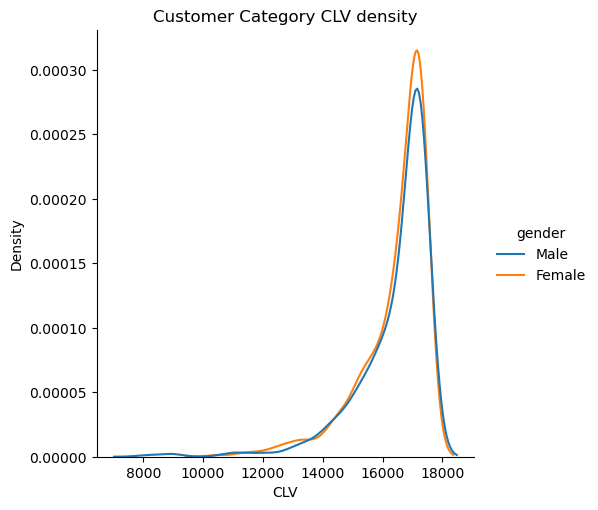

In [14]:
clv = sns.displot(df, x = 'CLV', kind = 'kde', hue = 'gender')
clv.set(title = 'Customer Category CLV density')

From the above graph we can conclude that Female (orange) customers are more likely to survive.

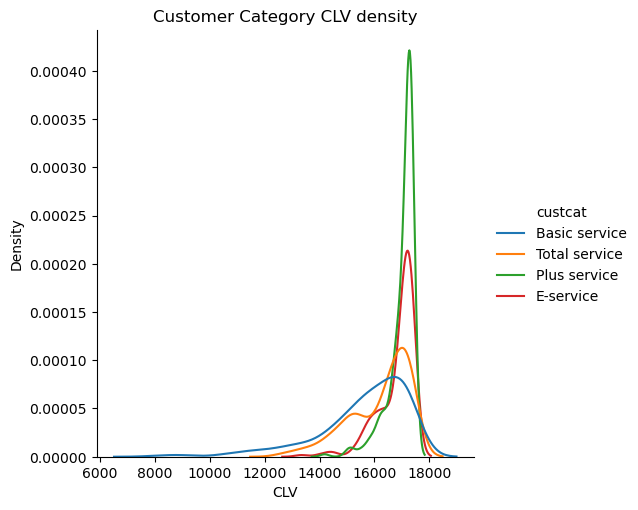

In [15]:
clv = sns.displot(df, x = 'CLV', kind = 'kde', hue = 'custcat')
clv.set(title = 'Customer Category CLV density')

From the above graph we can conclude that 'Plus Service' (green) category customers are the most likely to survive.

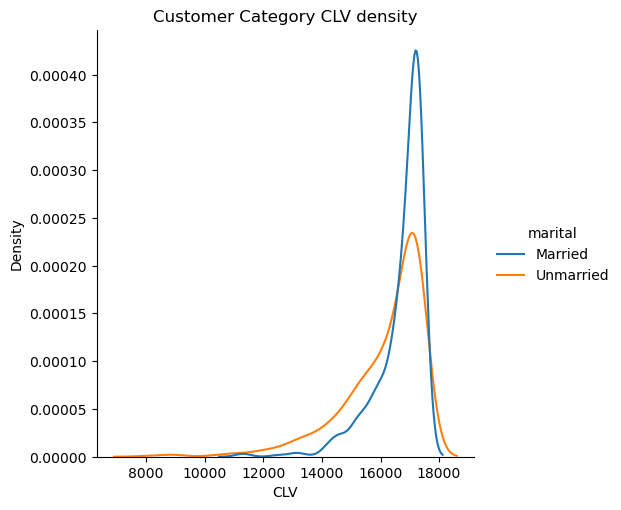

In [16]:
clv = sns.displot(df, x = 'CLV', kind = 'kde', hue = 'marital')
clv.set(title = 'Customer Category CLV density')

From the above graph we can conclude that Married (blue) customers are more likely to survive.

# Report

- interpret coefficients


In the Log-Normal Accelerated Failure Time (AFT) model, several coefficients play a crucial role in understanding the churn risk. The positive coefficients for both address and age suggest that higher values in these variables are associated with increased churn risk. Notably, the positive coefficients for custcat_E-service, custcat_Plus service, and custcat_Total service indicate higher churn risks for customers in these categories compared to the reference category. This suggests that customers subscribing to these services may exhibit shorter lifetimes. On the contrary, the negative coefficient for internet_Yes suggests that having an internet subscription is associated with a lower churn risk. The negative coefficients for marital_Unmarried and voice_Yes also indicate that unmarried customers and those with a voice subscription are associated with lower churn. The intercept represents the baseline hazard, and its positive value contributes to higher overall hazard rates. The standard error and confidence intervals provide a measure of the precision of these coefficient estimates. The model's concordance index of 0.78 and AIC of 2944.20 suggest reasonable predictive performance and model fit.

- the most valuable segments


In churn analysis, "valuable segments" are crucial customer groups that strongly influence a business's revenue and profitability. These segments often include customers with high spending, long-term relationships, or substantial representation in the customer base. To identify these valuable segments, one looks for categories with a mix of high CLV, low churn risk, and a notable contribution to overall revenue. For example, prioritizing efforts to retain loyal, high-spending customers with a lower likelihood of churning can significantly impact a business's financial success.

Our above analysis showed that for example being female, married, and subscribing to the 'Plus Service' category, indicate a lower churn risk, consequently these segments become strategically valuable for long-term business success.


- annual retention budget

To estimate the annual retention budget, we can leverage the provided CLV predictions and survival probabilities. The CLV represents the expected revenue per customer, and multiplying this by the survival probabilities for each customer segment gives an estimate of the annual revenue contribution. If the average Customer Lifetime Value (CLV) is 1,000 dollars, and the survival probability for a specific customer segment is 80 percent, the expected annual revenue per customer in that segment would be 1,000 * (80/100) = 800. If this segment constitutes 500 customers, the total expected annual revenue for this segment would be 800 * 500 = 400,000. Summing up similar calculations for all segments in the dataset provides an approximate annual revenue projection. Allocating a percentage of this total revenue, say 10 percent, to retention efforts would result in an indicative annual retention budget of 40,000. 


- suggestions for retention 

**Target Valuable Segments**: Concentrate retention efforts on segments identified as valuable, such as female customers, married individuals, and those subscribed to the 'Plus Service' category. Tailor marketing campaigns and loyalty programs to enhance engagement within these segments.

**Predictive Analytics**: Utilize predictive analytics to forecast potential churn events. By leveraging historical data and modeling techniques, businesses can anticipate churn risks and take preemptive measures to retain customers.

**Feedback Mechanism**: Establish a feedback mechanism to understand customer concerns and reasons for churn. This can be done through surveys, customer reviews, or feedback forms. Use this information to address pain points and improve overall customer satisfaction.